# Classify if a patient is Diabetic or Not

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\91901\Documents\Python\diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.info() #datatypes and null objects in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Confusion Matrix

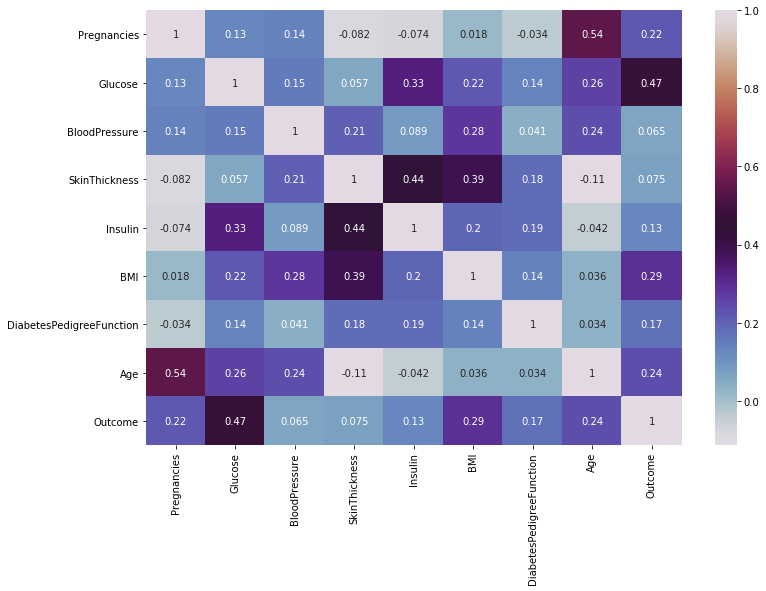

In [5]:
## Confusion matrix
#get correlation between each feature in the dataset
cor_mat = df.corr()
top_corr_features = cor_mat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="twilight")
plt.show()

# Box Plot on Age vs BMI

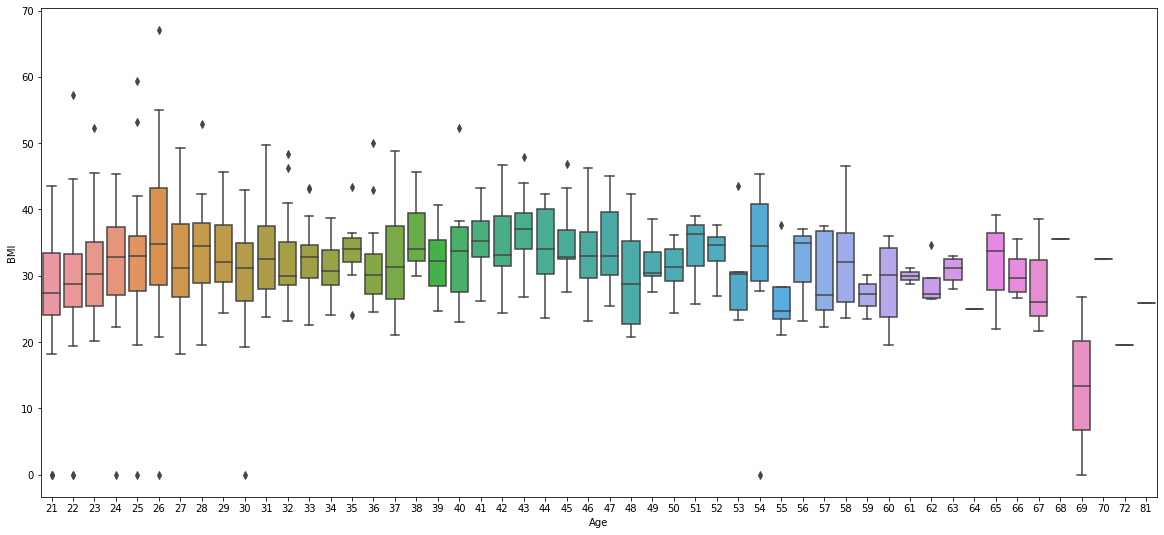

In [6]:
plt.figure(figsize=(20,9)) #setting the figure size
sns.boxplot(x='Age', y="BMI", data=df) #setting the x and y parameters

# Bar Plot on Age vs Glucose level

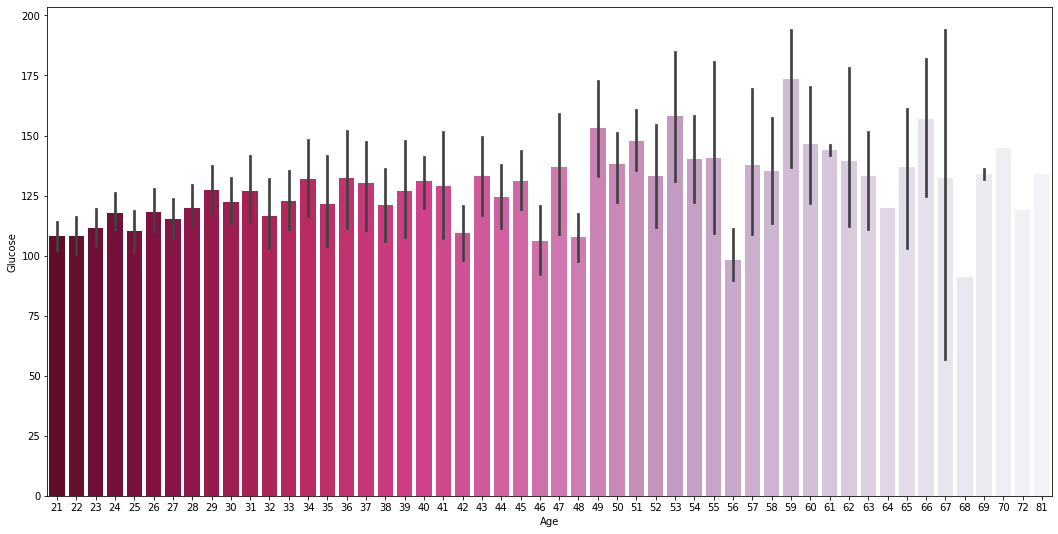

In [7]:
plt.figure(figsize=(18,9))
sns.barplot(x='Age', y="Glucose", palette='PuRd_r' , data=df)

# Scatter plot On Age vs Pregnancies

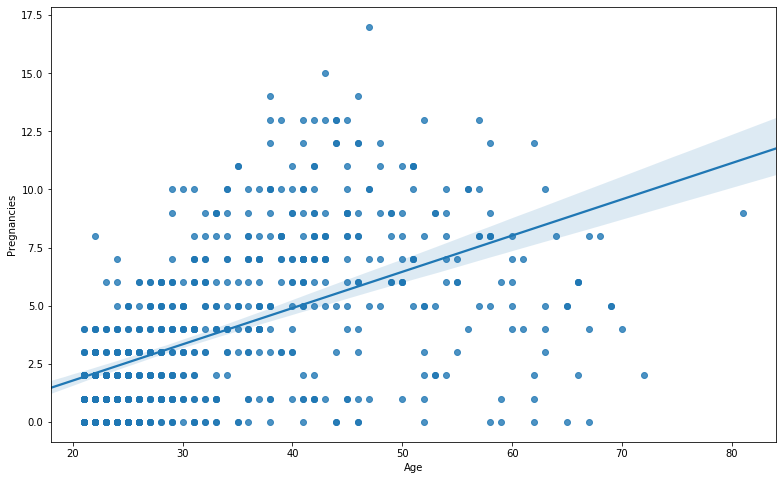

In [8]:
plt.figure(figsize=(13,8))
sns.regplot(x='Age', y="Pregnancies", data=df)

# No of Diabetes cases for every age Age group 

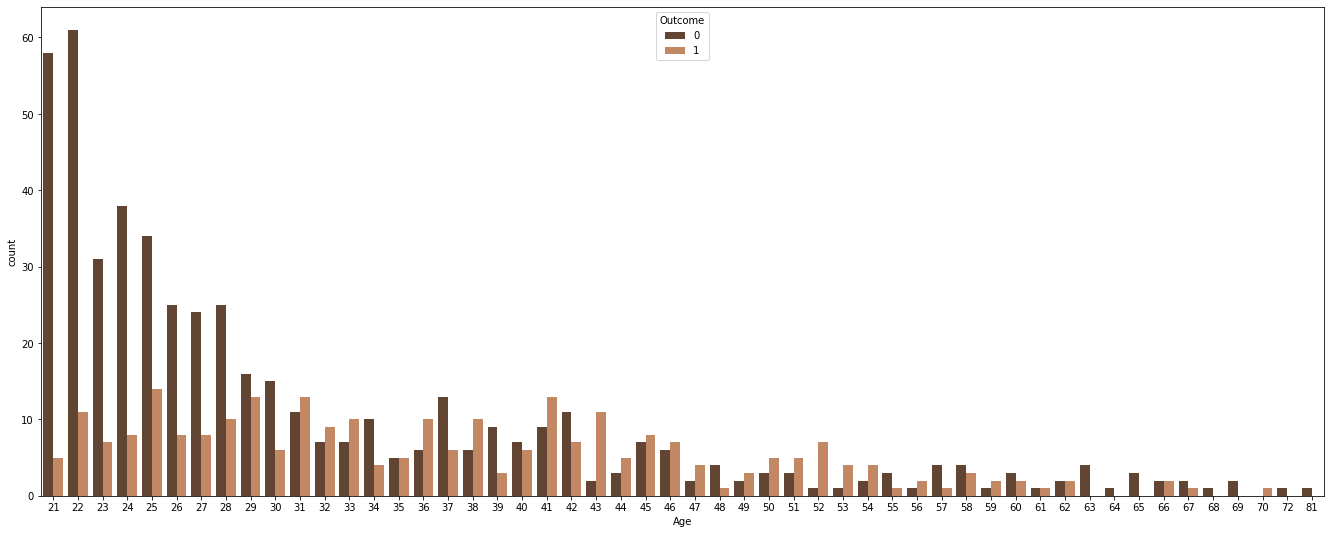

In [9]:
plt.figure(figsize=(23,9))
sns.countplot(x='Age',hue='Outcome',palette='copper',data=df)

Python throws an error when we group through an integer data type feature. So converting the Age feature to a string value  makes things easier for comparison.

In [10]:
df['Age']=df['Age'].astype('str') #convert age to string value
df_sum = df.groupby('Age', axis=0).sum() #sum of every feature for each group
df_sum.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
21,68,6824,4154,1219,4639,1752.5,27.331,5
22,112,7791,4588,1475,5363,2124.7,31.005,11
23,60,4240,2444,850,4485,1197.1,16.666,7
24,87,5423,2988,1193,4049,1498.2,18.104,8
25,85,5284,2864,1150,3979,1533.3,28.824,14


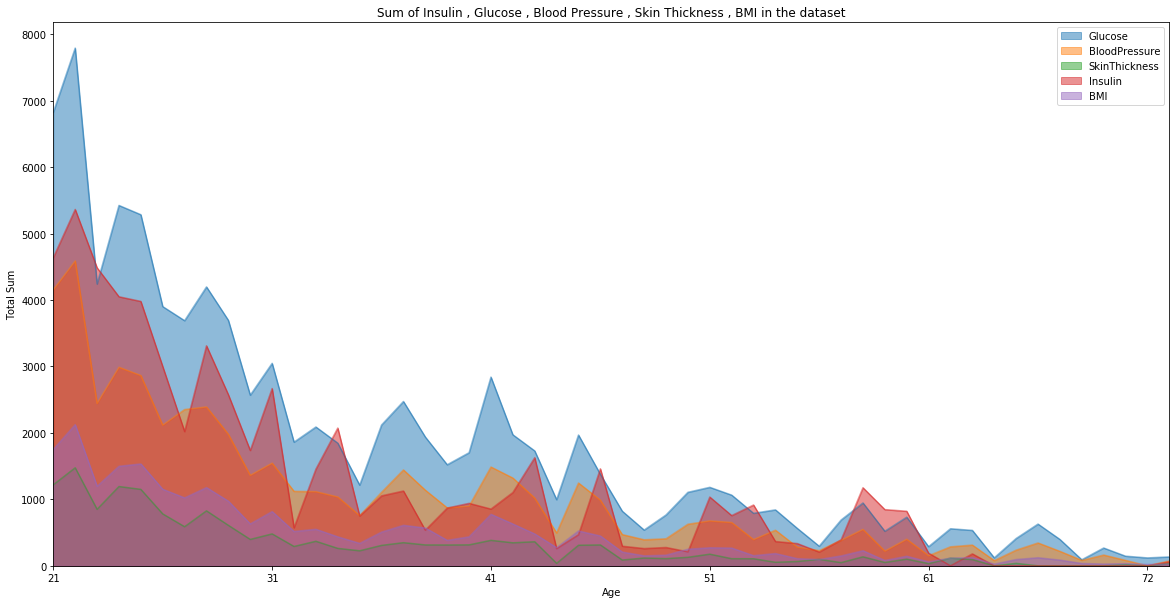

In [11]:
df_sum=df_sum.drop(['Pregnancies','Outcome','DiabetesPedigreeFunction'],axis=1) #excluding these features
df_sum.plot(kind='area',
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Sum of Insulin , Glucose , Blood Pressure , Skin Thickness , BMI in the dataset')
plt.ylabel('Total Sum')
plt.xlabel('Age')

plt.show()

# Preparing our dataset for model deployement

In [12]:
y = np.asarray(df['Outcome']) #Select the feature to predict
feature_columns = df[['BMI','Age','Glucose','Pregnancies','Insulin','DiabetesPedigreeFunction']] #choosing these features for training
X = np.asarray(feature_columns)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape) #View the split training set
print ('Test set:', X_test.shape,  y_test.shape) #View the split test set

Train set: (614, 6) (614,)
Test set: (154, 6) (154,)


# Support Vector Machines

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_val = clf.predict(X_test)
print("-----------------------SUPPORT VECTOR MACHINES----------------------")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mse = mean_squared_error(y_val, y_test)
print("Validation MAE for SVM: {}".format(mse))

-----------------------SUPPORT VECTOR MACHINES----------------------
Train set Accuracy:  1.0
Test set Accuracy:  0.6428571428571429
Validation MAE for SVM: 0.35714285714285715


C:\Users\91901\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#  Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
DTree.fit(X_train,y_train)
y_val = DTree.predict(X_test)
print("-----------------------DECISION TREE CLASSIFIER----------------------")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mse = mean_squared_error(y_val, y_test)
print("Validation for DTC : {}".format(mse))

-----------------------DECISION TREE CLASSIFIER----------------------
Train set Accuracy:  0.8631921824104235
Test set Accuracy:  0.7207792207792207
Validation for DTC : 0.2792207792207792


#  ADA Boost Classifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=15), n_estimators=900,
    algorithm="SAMME.R", learning_rate=0.9)
ada_clf.fit(X_train, y_train)
y_val = ada_clf.predict(X_test)
print("-----------------------ADA BOOST CLASSIFIER----------------------")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ada_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mse = mean_squared_error(y_val, y_test)
print("Validation MAE for ADA boost classifier is: {}".format(mse))

-----------------------ADA BOOST CLASSIFIER----------------------
Train set Accuracy:  1.0
Test set Accuracy:  0.7857142857142857
Validation MAE for ADA boost classifier is: 0.21428571428571427


# Logitic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
y_val = LR.predict(X_test)
print("-----------------------LOGISTIC REGRESSION----------------------")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mse = mean_squared_error(y_val, y_test)
print("Validation for LR : {}".format(mse))

-----------------------LOGISTIC REGRESSION----------------------
Train set Accuracy:  0.7654723127035831
Test set Accuracy:  0.7792207792207793
Validation for LR : 0.22077922077922077


#  K-Fold Method 

In [17]:
cv = KFold(n_splits=5)
accuracies = list()
max_attributes = len(list(feature_columns))
depth_range = range(1 , max_attributes + 1)

for depth in depth_range:
    fold_accuracy= []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    for train_fold , test_fold in cv.split(X_train):
        #f_train = X_train.loc[train_fold]
        #f_test = X_test.loc[test_fold]
        
        model = tree_model.fit(X = X_train , y = y_train)
        valid_acc = model.score(X = X_test , y = y_test)
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    print("Accuracy per fold : \n", fold_accuracy , '\n')
    print("Average accuracy", avg, '\n')

Accuracy per fold : 
 [0.7337662337662337, 0.7337662337662337, 0.7337662337662337, 0.7337662337662337, 0.7337662337662337] 

Average accuracy 0.7337662337662337 

Accuracy per fold : 
 [0.7987012987012987, 0.7987012987012987, 0.7987012987012987, 0.7987012987012987, 0.7987012987012987] 

Average accuracy 0.7987012987012987 

Accuracy per fold : 
 [0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857] 

Average accuracy 0.7857142857142857 

Accuracy per fold : 
 [0.7597402597402597, 0.7727272727272727, 0.7532467532467533, 0.7532467532467533, 0.7532467532467533] 

Average accuracy 0.7584415584415585 

Accuracy per fold : 
 [0.7402597402597403, 0.7467532467532467, 0.7467532467532467, 0.7467532467532467, 0.7337662337662337] 

Average accuracy 0.7428571428571428 

Accuracy per fold : 
 [0.7402597402597403, 0.7532467532467533, 0.7402597402597403, 0.7402597402597403, 0.7532467532467533] 

Average accuracy 0.7454545454545454 



#  Visualizing the ROC for each model

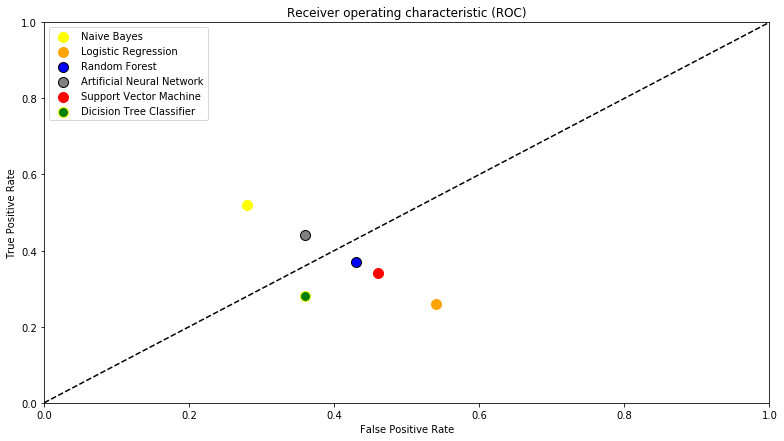

In [18]:
# fpr, tpr
plt.figure(figsize=(13,7))
naive_bayes = np.array([0.28, 0.52])
logistic = np.array([0.54, 0.26])
random_forest = np.array([0.43, 0.37])
ann = np.array([0.36, 0.44])
svm = np.array([0.46, 0.34])
dt = np.array([0.52, 0.28])

#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='gray', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(ann[0], dt[1], label = 'Dicision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper left')
plt.show()

Through this project we can conclude that diabetes affects the maximum between age group 20-30 years. 
So the probability of a person affected with diabetes is more if he/she is in the age group of 20-30. 